In [1]:
#import the libraries

import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score, make_scorer

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import TimeSeriesSplit

from nltk.corpus import stopwords

from sklearn.metrics import roc_auc_score
from sklearn.metrics import (precision_score,recall_score)
from sklearn import metrics

import yfinance as yf

import nltk

from scipy.stats import linregress
import scipy.stats

wn = nltk.WordNetLemmatizer()

In [2]:
#load the dataset

tweet_list = pd.read_csv('bitcoin4.csv')
tweet_list

C:\Users\rahil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339172,redirt bot,NaN,NaN,2021-07-21 17:38:47,79.0,46.0,34.0,False,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,"['crypto', 'defi', 'BTC', 'ETH', 'TRX']",IFTTT,False
2339173,CrossCoin.co,NaN,https://t.co/S1j1LOZSuP finds cross-border arb...,2018-08-30 16:12:38,92.0,1.0,0.0,False,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,['BTC'],CrossCoinCo,False
2339174,CrossCoin.co,NaN,https://t.co/S1j1LOZSuP finds cross-border arb...,2018-08-30 16:12:38,92.0,1.0,0.0,False,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,"['BTC', 'XRP']",CrossCoinCo,False
2339175,The_Crypto_Price_bot🤖,India,This is a bot that tweets prices of crypto cur...,2020-08-19 00:42:42,226.0,1.0,280.0,False,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,"['Crypto', 'Cryptocurrency', 'BTC', 'ETH', 'So...",Crypto_Price_Bot,False


In [3]:
#keeping only the important attributes

tweet_list = tweet_list[['date','text','user_followers']]
tweet_list

,date,text,user_followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [4]:
#renaming columns appropriately
tweet_list = tweet_list.rename(columns = {'date': 'Date', 'text': 'Tweet', 'user_followers':'User Followers'}, inplace = False)
tweet_list

,Date,Tweet,User Followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [5]:
#drop empty rows
tweet_list = tweet_list.dropna()
tweet_list

,Date,Tweet,User Followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [6]:
#checking the date format
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339114 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Date            object 
 1   Tweet           object 
 2   User Followers  float64
dtypes: float64(1), object(2)
memory usage: 71.4+ MB


Date seems to be in an 'object' form, so that's gonna be a problem

In [7]:
#finding the annoying rows with letters in the date column
annoying_list = tweet_list[tweet_list['Date'].str.contains("[a-zA-Z]").fillna(False)]
annoying_list

,Date,Tweet,User Followers
64943,"['ETH', 'BTC', 'Bitcoin']",Twitter Web App,36.0
137068,"['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...",Twitter for Android,499.0
180575,"['YieldFarming', 'Airdrop', 'Binance', 'Bitcoi...",Twitter Web App,127.0
693194,['btc'],Twitter Web App,531.0
697397,['btc'],Twitter Web App,21.0
1067665,"['YieldFarming', 'Airdrop', 'PancakeSwap', 'Gi...",Twitter for Android,1968.0
1347699,['Bitcoin'],Twitter for iPhone,0.0
1393938,"['cryptotrading', 'crypto', 'tradingbots', 'bi...",Twitter for iPhone,0.0
1513850,"['PW', 'pythonwealth', 'Presale', 'token', 'ic...",Twitter Web App,389.0
1611481,['bitcoin'],Twitter for iPhone,20.0


In [8]:
#dropping the annoying rows
tweet_list = tweet_list.drop([64943,137068,180575,693194,697397,1067665,1347699,1393938,1513850,1611481,1811149])
tweet_list

,Date,Tweet,User Followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [9]:
#set it as a date format
tweet_list['Date'] =  pd.to_datetime(tweet_list['Date'], format='%Y/%m/%d %H:%M:%S')
tweet_list

,Date,Tweet,User Followers
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",128.0
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14 20:29:36,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14 20:29:32,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14 20:29:31,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14 20:29:21,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [10]:
#checking 
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339103 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Date            datetime64[ns]
 1   Tweet           object        
 2   User Followers  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 71.4+ MB


In [11]:
#removing the time (hours,minutes and seconds) factor from the date column and just keeping the date itself
tweet_list['Date'] = pd.to_datetime(tweet_list['Date']).dt.date
tweet_list.info

<bound method DataFrame.info of                Date                                              Tweet  \
0        2021-02-10  Blue Ridge Bank shares halted by NYSE after #b...   
1        2021-02-10  😎 Today, that's this #Thursday, we will do a "...   
2        2021-02-10  Guys evening, I have read this article about B...   
3        2021-02-10  $BTC A big chance in a billion! Price: \487264...   
4        2021-02-10  This network is secured by 9 508 nodes as of t...   
...             ...                                                ...   
2339172  2022-02-14  https://t.co/q3XA8T0O2s continues to add almos...   
2339173  2022-02-14  The largest cross-border arbitrage seen by @Cr...   
2339174  2022-02-14  The largest exchange premiums &amp; discounts ...   
2339175  2022-02-14  #Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...   
2339176  2022-02-14  #BTC Bullish Breakout on the 4 Hr RSI. I think...   

         User Followers  
0                8534.0  
1                6769.0  
2

In [12]:
#checking again
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339103 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Date            object 
 1   Tweet           object 
 2   User Followers  float64
dtypes: float64(1), object(2)
memory usage: 71.4+ MB


In [13]:
#once again reinstate it as a date format, as it has now become an object
tweet_list['Date'] =  pd.to_datetime(tweet_list['Date'], format='%Y/%m/%d %H:%M:%S')
tweet_list

,Date,Tweet,User Followers
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2021-02-10,"Guys evening, I have read this article about B...",128.0
3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,625.0
4,2021-02-10,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...
2339172,2022-02-14,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339173,2022-02-14,The largest cross-border arbitrage seen by @Cr...,92.0
2339174,2022-02-14,The largest exchange premiums &amp; discounts ...,92.0
2339175,2022-02-14,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [14]:
#checking one more time
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339103 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Date            datetime64[ns]
 1   Tweet           object        
 2   User Followers  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 71.4+ MB


Date seems to be in 'datetime64' form, so everything is in order now

In [15]:
#setting the user followers as a float to work with 

tweet_list['User Followers'] = tweet_list['User Followers'].astype(float)
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339103 entries, 0 to 2339176
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Date            datetime64[ns]
 1   Tweet           object        
 2   User Followers  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 71.4+ MB


In [16]:
#picking the top 100 tweets out of each day
top100_everyday = tweet_list.groupby('Date')['User Followers'].nlargest(100).reset_index()
top100_everyday

,Date,level_1,User Followers
0,2021-02-05,20473,731739.0
1,2021-02-05,21440,270717.0
2,2021-02-05,20755,265540.0
3,2021-02-05,19972,113378.0
4,2021-02-05,21062,80629.0
...,...,...,...
11495,2022-02-18,2284960,112851.0
11496,2022-02-18,2285052,112851.0
11497,2022-02-18,2289435,112052.0
11498,2022-02-18,2296486,111318.0


In [17]:
merging_factor = tweet_list.reset_index()
merging_factor

,index,Date,Tweet,User Followers
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2,2021-02-10,"Guys evening, I have read this article about B...",128.0
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,625.0
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...,...
2339098,2339172,2022-02-14,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339099,2339173,2022-02-14,The largest cross-border arbitrage seen by @Cr...,92.0
2339100,2339174,2022-02-14,The largest exchange premiums &amp; discounts ...,92.0
2339101,2339175,2022-02-14,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [18]:
merging_factor = merging_factor.rename(columns = {'index':'level_1'})
merging_factor

,level_1,Date,Tweet,User Followers
0,0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,8534.0
1,1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",6769.0
2,2,2021-02-10,"Guys evening, I have read this article about B...",128.0
3,3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,625.0
4,4,2021-02-10,This network is secured by 9 508 nodes as of t...,1249.0
...,...,...,...,...
2339098,2339172,2022-02-14,https://t.co/q3XA8T0O2s continues to add almos...,79.0
2339099,2339173,2022-02-14,The largest cross-border arbitrage seen by @Cr...,92.0
2339100,2339174,2022-02-14,The largest exchange premiums &amp; discounts ...,92.0
2339101,2339175,2022-02-14,#Crypto #Cryptocurrency #BTC #ETH #Solana #ADA...,226.0


In [19]:
tweet_list = top100_everyday.merge(merging_factor[['level_1','Tweet']])
tweet_list

,Date,level_1,User Followers,Tweet
0,2021-02-05,20473,731739.0,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-05,21440,270717.0,"Binance-Listed ""FUN"" token to tap from FreeBit..."
2,2021-02-05,20755,265540.0,It's never too late to start investing in #BTC...
3,2021-02-05,19972,113378.0,This week in #Klever:\n\n1. @kucoincom list #K...
4,2021-02-05,21062,80629.0,⚠ #Crypto Brief ⚠\n\n#Bitcoin #Ethereum #Bitco...
...,...,...,...,...
11495,2022-02-18,2284960,112851.0,"I HATE THIS #SHITCOIN SO MUCH, BUT IM 100% SUR..."
11496,2022-02-18,2285052,112851.0,"OK, YOU PIECE OF SHIT! TIME TO PUMP BACK! #BTC..."
11497,2022-02-18,2289435,112052.0,"I hope #BTC get upto $250,000"
11498,2022-02-18,2296486,111318.0,What if... 🙃 #BTC\n\n👉 https://t.co/MvOPtJyU0U...


In [20]:
#checking to see if it worked

tweet_list.head(25)

,Date,level_1,User Followers,Tweet
0,2021-02-05,20473,731739.0,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-05,21440,270717.0,"Binance-Listed ""FUN"" token to tap from FreeBit..."
2,2021-02-05,20755,265540.0,It's never too late to start investing in #BTC...
3,2021-02-05,19972,113378.0,This week in #Klever:\n\n1. @kucoincom list #K...
4,2021-02-05,21062,80629.0,⚠ #Crypto Brief ⚠\n\n#Bitcoin #Ethereum #Bitco...
5,2021-02-05,21389,78780.0,https://t.co/zdsqyF1dxf Surge in #Bitcoin ener...
6,2021-02-05,19944,78779.0,https://t.co/zdsqyF1dxf Altcoins soar to multi...
7,2021-02-05,19975,78779.0,https://t.co/zdsqyF1dxf #Bitcoin is not a bubb...
8,2021-02-05,20027,78779.0,https://t.co/h0XWfZiGQM Market Wrap: #Bitcoin ...
9,2021-02-05,20221,78779.0,https://t.co/zdsqyF1dxf Price analysis 2/5: BT...


In [21]:
#finally dropping unused columns

tweet_list.drop(['level_1','User Followers'],
                 axis = 1, inplace = True)

tweet_list

,Date,Tweet
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-05,"Binance-Listed ""FUN"" token to tap from FreeBit..."
2,2021-02-05,It's never too late to start investing in #BTC...
3,2021-02-05,This week in #Klever:\n\n1. @kucoincom list #K...
4,2021-02-05,⚠ #Crypto Brief ⚠\n\n#Bitcoin #Ethereum #Bitco...
...,...,...
11495,2022-02-18,"I HATE THIS #SHITCOIN SO MUCH, BUT IM 100% SUR..."
11496,2022-02-18,"OK, YOU PIECE OF SHIT! TIME TO PUMP BACK! #BTC..."
11497,2022-02-18,"I hope #BTC get upto $250,000"
11498,2022-02-18,What if... 🙃 #BTC\n\n👉 https://t.co/MvOPtJyU0U...


In [22]:
#removing duplicates

tweet_list.drop_duplicates(inplace = True)

tweet_list

,Date,Tweet
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-05,"Binance-Listed ""FUN"" token to tap from FreeBit..."
2,2021-02-05,It's never too late to start investing in #BTC...
3,2021-02-05,This week in #Klever:\n\n1. @kucoincom list #K...
4,2021-02-05,⚠ #Crypto Brief ⚠\n\n#Bitcoin #Ethereum #Bitco...
...,...,...
11495,2022-02-18,"I HATE THIS #SHITCOIN SO MUCH, BUT IM 100% SUR..."
11496,2022-02-18,"OK, YOU PIECE OF SHIT! TIME TO PUMP BACK! #BTC..."
11497,2022-02-18,"I hope #BTC get upto $250,000"
11498,2022-02-18,What if... 🙃 #BTC\n\n👉 https://t.co/MvOPtJyU0U...


In [23]:
# create a new list where all tweets will fit in each of row per date
tweets_list = pd.DataFrame(columns=['Date','Tweet'])
tweets_list

,Date,Tweet


In [24]:
# code for altering the tweets to all fit in each row per say
indx=0
get_tweet=""
for i in range(0,len(tweet_list)-1):
    get_date=tweet_list.Date.iloc[i]
    next_date=tweet_list.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+tweet_list.Tweet.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweet'])
        tweets_list = pd.concat([tweets_list, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [25]:
#checking
tweets_list

,Date,Tweet
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...
2,2021-02-07,Here are countries where Cryptocurrency tradi...
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t..."
...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne..."
110,2022-02-14,"promote your project with us, send a dm and s..."
111,2022-02-15,"promote your project with us, send a dm 📩\n\n..."
112,2022-02-16,"promote your project with us, send a dm and s..."


In [26]:
#ordering the dates
tweets_list = tweets_list.sort_values(by='Date',ascending = True)
tweets_list.head(10)

,Date,Tweet
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...
2,2021-02-07,Here are countries where Cryptocurrency tradi...
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t..."
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra..."
6,2021-02-13,“A currency is never supposed to be more vola...
7,2021-02-14,"1 #BTC = $49,000.\n\nGuess everyone’s buying ..."
8,2021-02-15,#Bitcoin has had a huge couple of weeks and a...
9,2021-02-18,Stablecoins saw more transaction volume than ...


In [27]:
#print a sample of the tweets
tweets_list.Tweet[0]

'Have you seen our #Bitcoin Analytics Page? \n\nLearn more about Bitcoin with data points such as on-chain analytics,… https://t.co/KYBSYe2HuI Binance-Listed "FUN" token to tap from FreeBitcoin’s 41 million users through Premium Membership program launch.… https://t.co/uc8mV6IZVG It\'s never too late to start investing in #BTC! Use  @SimplexCC on #Poloniex to buy and sell #crypto using credit /… https://t.co/4aEa8KNmDI This week in #Klever:\n\n1. @kucoincom list #KLV with #USDT &amp; #BTC pairs\n2. Klever burns 379 million KLV, 9% of circu… https://t.co/MUsPc53CmI ⚠ #Crypto Brief ⚠\n\n#Bitcoin #Ethereum #Bitcoinnews #EthereumNews #XBT #BTC #XET\n\nhttps://t.co/CQ0RDSdQ4A https://t.co/zdsqyF1dxf Surge in #Bitcoin energy consumption sparks debate in #crypto community… https://t.co/e2otFjldJK https://t.co/zdsqyF1dxf Altcoins soar to multi-year highs while #Bitcoin price gathers steam… https://t.co/oG979F5hKj https://t.co/zdsqyF1dxf #Bitcoin is not a bubble anymore, Amber Group CEO says ht

### General Cleaning

In [28]:
#Cleaning Text (RT, Punctuation, links etc)

#Creating new dataframe and new features
clean_tweets = pd.DataFrame(tweets_list)
clean_tweets["Clean"] = clean_tweets["Tweet"]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
clean_tweets["Clean"] = clean_tweets.Clean.map(remove_rt).map(rt)
clean_tweets["Clean"] = clean_tweets.Clean.str.lower()
clean_tweets

,Date,Tweet,Clean
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...,have you seen our bitcoin analytics page l...
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,cme group s chief economist calls bitcoin a...
2,2021-02-07,Here are countries where Cryptocurrency tradi...,here are countries where cryptocurrency tradi...
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,breaking tesla bought 1 5b in bitcoin se...
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",bitcoin is an asset says i think in t...
...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",with bitcoin it is possible to take an owne...
110,2022-02-14,"promote your project with us, send a dm and s...",promote your project with us send a dm and s...
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",promote your project with us send a dm n...
112,2022-02-16,"promote your project with us, send a dm and s...",promote your project with us send a dm and s...


In [29]:
#print a sample of the tweets
#we can now see that the tweets have become much cleaner

clean_tweets.Clean[0]

'have you seen our  bitcoin analytics page    learn more about bitcoin with data points such as on chain analytics     binance listed  fun  token to tap from freebitcoin s 41 million users through premium membership program launch     it s never too late to start investing in  btc  use    on  poloniex to buy and sell  crypto using credit      this week in  klever   1    list  klv with  usdt  amp   btc pairs 2  klever burns 379 million klv  9  of circu       crypto brief     bitcoin  ethereum  bitcoinnews  ethereumnews  xbt  btc  xet      surge in  bitcoin energy consumption sparks debate in  crypto community      altcoins soar to multi year highs while  bitcoin price gathers steam       bitcoin is not a bubble anymore  amber group ceo says    btc      market wrap   bitcoin rises to  38 3k while ether s new high takes spotlight      price analysis 2 5  btc  eth  xrp  dot  ada  link  ltc  bnb  bch  xlm      blocktower capital cio estimates another 9 22 months of bull run for  crypto     

### Removing Numbers

In [30]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
clean_tweets['Clean'] = clean_tweets['Clean'].apply(lambda x: cleaning_numbers(x))
clean_tweets.Clean[0]

'have you seen our  bitcoin analytics page    learn more about bitcoin with data points such as on chain analytics     binance listed  fun  token to tap from freebitcoin s  million users through premium membership program launch     it s never too late to start investing in  btc  use    on  poloniex to buy and sell  crypto using credit      this week in  klever       list  klv with  usdt  amp   btc pairs   klever burns  million klv    of circu       crypto brief     bitcoin  ethereum  bitcoinnews  ethereumnews  xbt  btc  xet      surge in  bitcoin energy consumption sparks debate in  crypto community      altcoins soar to multi year highs while  bitcoin price gathers steam       bitcoin is not a bubble anymore  amber group ceo says    btc      market wrap   bitcoin rises to   k while ether s new high takes spotlight      price analysis    btc  eth  xrp  dot  ada  link  ltc  bnb  bch  xlm      blocktower capital cio estimates another   months of bull run for  crypto      south african r

### Stopwords

In [31]:
#removing the stopwords

stop = stopwords.words('english')
clean_tweets['Clean'] = clean_tweets['Clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
clean_tweets

,Date,Tweet,Clean
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...,seen bitcoin analytics page learn bitcoin data...
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,cme group chief economist calls bitcoin emergi...
2,2021-02-07,Here are countries where Cryptocurrency tradi...,countries cryptocurrency trading legal illegal...
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,breaking tesla bought b bitcoin sec filing tsl...
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",bitcoin asset says think future going able buy...
...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",bitcoin possible take ownership stake entire i...
110,2022-02-14,"promote your project with us, send a dm and s...",promote project us send dm see values nfts nft...
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",promote project us send dm nfts nftcommunity n...
112,2022-02-16,"promote your project with us, send a dm and s...",promote project us send dm see values nfts nft...


In [32]:
#print a sample of the tweets again
#we can now see that the tweets have their useless words removed as well 
clean_tweets.Clean[0]

'seen bitcoin analytics page learn bitcoin data points chain analytics binance listed fun token tap freebitcoin million users premium membership program launch never late start investing btc use poloniex buy sell crypto using credit week klever list klv usdt amp btc pairs klever burns million klv circu crypto brief bitcoin ethereum bitcoinnews ethereumnews xbt btc xet surge bitcoin energy consumption sparks debate crypto community altcoins soar multi year highs bitcoin price gathers steam bitcoin bubble anymore amber group ceo says btc market wrap bitcoin rises k ether new high takes spotlight price analysis btc eth xrp dot ada link ltc bnb bch xlm blocktower capital cio estimates another months bull run crypto south african regulator warns crypto investors prepared lose following coll amid ongoing legal proceedings bitfinex announces tether loan repayment bitcoin news roundup feb cryptocurrency btc central bank nigeria bans banks servicing crypto exchanges gaming firm agrees purchase 

### Tokenizing

In [33]:
#tokenizing

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

clean_tweets['Clean'] = clean_tweets['Clean'].apply(lambda x: tokenize(x.lower()))
clean_tweets

,Date,Tweet,Clean
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...,"[seen, bitcoin, analytics, page, learn, bitcoi..."
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,"[cme, group, chief, economist, calls, bitcoin,..."
2,2021-02-07,Here are countries where Cryptocurrency tradi...,"[countries, cryptocurrency, trading, legal, il..."
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,"[breaking, tesla, bought, b, bitcoin, sec, fil..."
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...","[bitcoin, asset, says, think, future, going, a..."
...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...","[bitcoin, possible, take, ownership, stake, en..."
110,2022-02-14,"promote your project with us, send a dm and s...","[promote, project, us, send, dm, see, values, ..."
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...","[promote, project, us, send, dm, nfts, nftcomm..."
112,2022-02-16,"promote your project with us, send a dm and s...","[promote, project, us, send, dm, see, values, ..."


In [34]:
#print a sample of the tweets again
#we can now see that the tweets are in each individual group
clean_tweets.Clean[0]

['seen',
 'bitcoin',
 'analytics',
 'page',
 'learn',
 'bitcoin',
 'data',
 'points',
 'chain',
 'analytics',
 'binance',
 'listed',
 'fun',
 'token',
 'tap',
 'freebitcoin',
 'million',
 'users',
 'premium',
 'membership',
 'program',
 'launch',
 'never',
 'late',
 'start',
 'investing',
 'btc',
 'use',
 'poloniex',
 'buy',
 'sell',
 'crypto',
 'using',
 'credit',
 'week',
 'klever',
 'list',
 'klv',
 'usdt',
 'amp',
 'btc',
 'pairs',
 'klever',
 'burns',
 'million',
 'klv',
 'circu',
 'crypto',
 'brief',
 'bitcoin',
 'ethereum',
 'bitcoinnews',
 'ethereumnews',
 'xbt',
 'btc',
 'xet',
 'surge',
 'bitcoin',
 'energy',
 'consumption',
 'sparks',
 'debate',
 'crypto',
 'community',
 'altcoins',
 'soar',
 'multi',
 'year',
 'highs',
 'bitcoin',
 'price',
 'gathers',
 'steam',
 'bitcoin',
 'bubble',
 'anymore',
 'amber',
 'group',
 'ceo',
 'says',
 'btc',
 'market',
 'wrap',
 'bitcoin',
 'rises',
 'k',
 'ether',
 'new',
 'high',
 'takes',
 'spotlight',
 'price',
 'analysis',
 'btc',
 'eth

### Lemmatizing

In [35]:
# lemmatization

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

clean_tweets['Clean'] = clean_tweets['Clean'].apply(lambda x: lemmatizing(x))
clean_tweets

,Date,Tweet,Clean
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...,"[seen, bitcoin, analytics, page, learn, bitcoi..."
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,"[cme, group, chief, economist, call, bitcoin, ..."
2,2021-02-07,Here are countries where Cryptocurrency tradi...,"[country, cryptocurrency, trading, legal, ille..."
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,"[breaking, tesla, bought, b, bitcoin, sec, fil..."
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...","[bitcoin, asset, say, think, future, going, ab..."
...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...","[bitcoin, possible, take, ownership, stake, en..."
110,2022-02-14,"promote your project with us, send a dm and s...","[promote, project, u, send, dm, see, value, nf..."
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...","[promote, project, u, send, dm, nfts, nftcommu..."
112,2022-02-16,"promote your project with us, send a dm and s...","[promote, project, u, send, dm, see, value, nf..."


In [36]:
#print a sample of the tweets again
#we can now see that the tweets are lemmatized
clean_tweets.Clean[0]

['seen',
 'bitcoin',
 'analytics',
 'page',
 'learn',
 'bitcoin',
 'data',
 'point',
 'chain',
 'analytics',
 'binance',
 'listed',
 'fun',
 'token',
 'tap',
 'freebitcoin',
 'million',
 'user',
 'premium',
 'membership',
 'program',
 'launch',
 'never',
 'late',
 'start',
 'investing',
 'btc',
 'use',
 'poloniex',
 'buy',
 'sell',
 'crypto',
 'using',
 'credit',
 'week',
 'klever',
 'list',
 'klv',
 'usdt',
 'amp',
 'btc',
 'pair',
 'klever',
 'burn',
 'million',
 'klv',
 'circu',
 'crypto',
 'brief',
 'bitcoin',
 'ethereum',
 'bitcoinnews',
 'ethereumnews',
 'xbt',
 'btc',
 'xet',
 'surge',
 'bitcoin',
 'energy',
 'consumption',
 'spark',
 'debate',
 'crypto',
 'community',
 'altcoins',
 'soar',
 'multi',
 'year',
 'high',
 'bitcoin',
 'price',
 'gather',
 'steam',
 'bitcoin',
 'bubble',
 'anymore',
 'amber',
 'group',
 'ceo',
 'say',
 'btc',
 'market',
 'wrap',
 'bitcoin',
 'rise',
 'k',
 'ether',
 'new',
 'high',
 'take',
 'spotlight',
 'price',
 'analysis',
 'btc',
 'eth',
 'xrp',

## Yahoo Finance

In [37]:
#using yahoo finance to look at the data for bitcoin
yahoo_bitcoin = yf.download('BTC-USD',start = '2021-02-05', end= '2022-02-18',)
yahoo_bitcoin

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-04,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,68838074392
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
...,...,...,...,...,...,...
2022-02-13,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
2022-02-14,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012
2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051


In [38]:
yahoo_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 2021-02-04 to 2022-02-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       379 non-null    float64
 1   High       379 non-null    float64
 2   Low        379 non-null    float64
 3   Close      379 non-null    float64
 4   Adj Close  379 non-null    float64
 5   Volume     379 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.7 KB


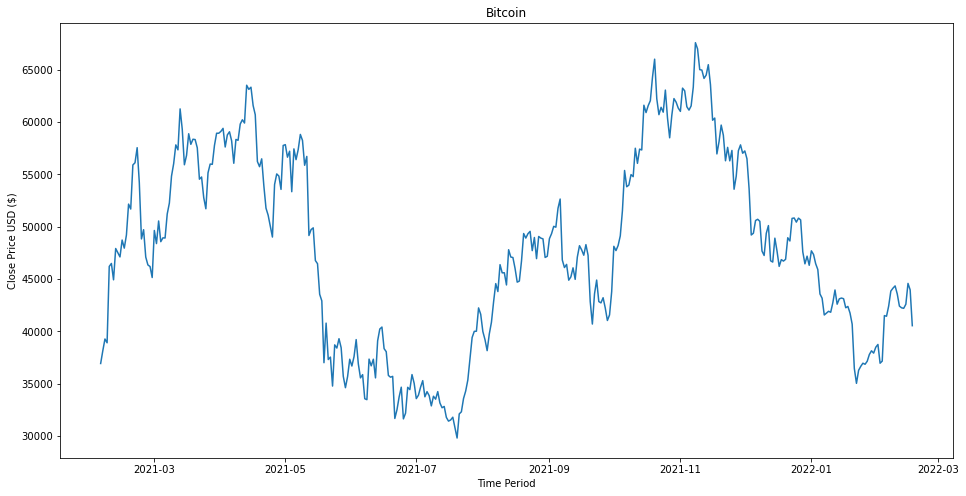

In [39]:
#visualizing the Adj Closing Price Data

plt.figure(figsize=(16,8))
plt.title('Bitcoin')
plt.xlabel('Time Period')
plt.ylabel('Close Price USD ($)')
plt.plot(yahoo_bitcoin['Adj Close'])
plt.show()

In [40]:
#resetting the index to get ready for merging
yahoo_bitcoin = yahoo_bitcoin.reset_index()
yahoo_bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-04,37475.105469,38592.175781,36317.500000,36926.066406,36926.066406,68838074392
1,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
3,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
4,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
...,...,...,...,...,...,...,...
374,2022-02-13,42236.566406,42693.054688,41950.941406,42197.515625,42197.515625,14741589015
375,2022-02-14,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012
376,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
377,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657


In [41]:
#merging the yahoo finance prices of bitcoin along with its tweets
tweets_list = tweets_list.merge(yahoo_bitcoin,on='Date')
tweets_list

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,Have you seen our #Bitcoin Analytics Page? \n\...,"[seen, bitcoin, analytics, page, learn, bitcoi...",36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,"[cme, group, chief, economist, call, bitcoin, ...",38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2,2021-02-07,Here are countries where Cryptocurrency tradi...,"[country, cryptocurrency, trading, legal, ille...",39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,"[breaking, tesla, bought, b, bitcoin, sec, fil...",38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...","[bitcoin, asset, say, think, future, going, ab...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886
...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...","[bitcoin, possible, take, ownership, stake, en...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300
110,2022-02-14,"promote your project with us, send a dm and s...","[promote, project, u, send, dm, see, value, nf...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...","[promote, project, u, send, dm, nfts, nftcommu...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
112,2022-02-16,"promote your project with us, send a dm and s...","[promote, project, u, send, dm, see, value, nf...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657


In [42]:
#calculating the crypto trend by subtracting the current price - the previous day

tweets_list["Price Difference"] = tweets_list["Adj Close"].diff()

#since the first day won't be accounted for, we need to remove the NA value in the first row 

tweets_list.dropna(inplace = True)

tweets_list

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume,Price Difference
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,"[cme, group, chief, economist, call, bitcoin, ...",38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125
2,2021-02-07,Here are countries where Cryptocurrency tradi...,"[country, cryptocurrency, trading, legal, ille...",39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,"[breaking, tesla, bought, b, bitcoin, sec, fil...",38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...","[bitcoin, asset, say, think, future, going, ab...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...","[part, menu, say, bitcoin, corporation, balanc...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875
...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...","[bitcoin, possible, take, ownership, stake, en...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875
110,2022-02-14,"promote your project with us, send a dm and s...","[promote, project, u, send, dm, see, value, nf...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...","[promote, project, u, send, dm, nfts, nftcommu...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156
112,2022-02-16,"promote your project with us, send a dm and s...","[promote, project, u, send, dm, see, value, nf...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750


In [43]:
#setting the labels of the dataset

RISE = 1

FALL = 0 

tweets_list["Label"] = np.where(
    tweets_list["Price Difference"] > 0, RISE, FALL
) 

tweets_list

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,"[cme, group, chief, economist, call, bitcoin, ...",38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1
2,2021-02-07,Here are countries where Cryptocurrency tradi...,"[country, cryptocurrency, trading, legal, ille...",39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,"[breaking, tesla, bought, b, bitcoin, sec, fil...",38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...","[bitcoin, asset, say, think, future, going, ab...",46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...","[part, menu, say, bitcoin, corporation, balanc...",46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0
...,...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...","[bitcoin, possible, take, ownership, stake, en...",44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875,1
110,2022-02-14,"promote your project with us, send a dm and s...","[promote, project, u, send, dm, see, value, nf...",42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906,0
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...","[promote, project, u, send, dm, nfts, nftcommu...",42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156,1
112,2022-02-16,"promote your project with us, send a dm and s...","[promote, project, u, send, dm, see, value, nf...",44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750,0


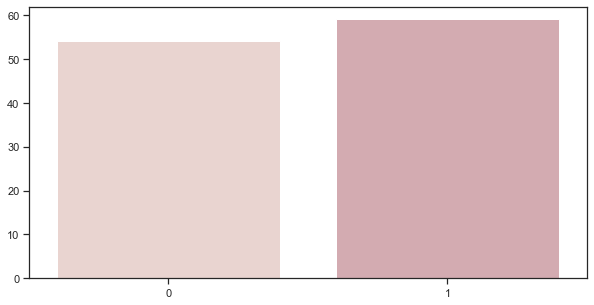

In [44]:
balance = tweets_list.Label.value_counts()
sns.set_theme(style="ticks")
plt.figure(figsize=(10,5))
sns.barplot(x=balance.index, y=balance.values, palette=sns.cubehelix_palette())
plt.show()

In [45]:
tweets_list['Label'].value_counts()

1    59
0    54
Name: Label, dtype: int64

In [46]:
# Convert the tweets into string from list
tweets_list["Clean"] = tweets_list["Clean"].agg(lambda x: ' '.join(map(str, x)))
tweets_list

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,cme group chief economist call bitcoin emergin...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1
2,2021-02-07,Here are countries where Cryptocurrency tradi...,country cryptocurrency trading legal illegal a...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,breaking tesla bought b bitcoin sec filing tsl...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",bitcoin asset say think future going able buy ...,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",part menu say bitcoin corporation balance shee...,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0
...,...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",bitcoin possible take ownership stake entire i...,44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875,1
110,2022-02-14,"promote your project with us, send a dm and s...",promote project u send dm see value nfts nftco...,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906,0
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",promote project u send dm nfts nftcommunity nf...,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156,1
112,2022-02-16,"promote your project with us, send a dm and s...",promote project u send dm see value nfts nftco...,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750,0


In [47]:
#Calculating Negative, Positive, Neutral and Compound values

tweets_list[['Polarity', 'Subjectivity']] = tweets_list['Clean'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_list['Clean'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweets_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tweets_list.loc[index, 'sentiment'] = "positive"
    else:
        tweets_list.loc[index, 'sentiment'] = "neutral"
    tweets_list.loc[index, 'neg'] = neg
    tweets_list.loc[index, 'neu'] = neu
    tweets_list.loc[index, 'pos'] = pos
    tweets_list.loc[index, 'compound'] = comp

tweets_list

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Polarity,Subjectivity,sentiment,neg,neu,pos,compound
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,cme group chief economist call bitcoin emergin...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1,0.134193,0.381740,positive,0.035,0.830,0.134,0.9980
2,2021-02-07,Here are countries where Cryptocurrency tradi...,country cryptocurrency trading legal illegal a...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0,0.127266,0.381238,positive,0.052,0.794,0.155,0.9982
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,breaking tesla bought b bitcoin sec filing tsl...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1,0.116754,0.371345,positive,0.037,0.828,0.135,0.9981
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",bitcoin asset say think future going able buy ...,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1,0.078746,0.393756,positive,0.043,0.825,0.132,0.9977
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",part menu say bitcoin corporation balance shee...,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0,0.096121,0.424299,positive,0.056,0.825,0.119,0.9939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2022-02-09,"With #Bitcoin, it is possible to take an owne...",bitcoin possible take ownership stake entire i...,44096.703125,44727.800781,43232.968750,44338.796875,44338.796875,23245887300,9308.546875,1,0.090282,0.421282,positive,0.049,0.783,0.167,0.9987
110,2022-02-14,"promote your project with us, send a dm and s...",promote project u send dm see value nfts nftco...,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012,-1751.878906,0,0.334751,0.493099,positive,0.030,0.798,0.172,0.9997
111,2022-02-15,"promote your project with us, send a dm 📩\n\n...",promote project u send dm nfts nftcommunity nf...,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051,1988.285156,1,0.370676,0.498904,positive,0.016,0.843,0.141,0.9997
112,2022-02-16,"promote your project with us, send a dm and s...",promote project u send dm see value nfts nftco...,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657,-613.343750,0,0.308882,0.493063,positive,0.019,0.850,0.131,0.9996


In [48]:
#scanning through all the dates
pd.set_option('display.max_rows', None)
tweets_list

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Polarity,Subjectivity,sentiment,neg,neu,pos,compound
1,2021-02-06,CME Group’s Chief #Economist Calls #Bitcoin A...,cme group chief economist call bitcoin emergin...,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,1121.703125,1,0.134193,0.381740,positive,0.035,0.830,0.134,0.9980
2,2021-02-07,Here are countries where Cryptocurrency tradi...,country cryptocurrency trading legal illegal a...,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,-362.570312,0,0.127266,0.381238,positive,0.052,0.794,0.155,0.9982
3,2021-02-08,BREAKING: Tesla bought $1.5B in #bitcoin - SE...,breaking tesla bought b bitcoin sec filing tsl...,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,7293.023438,1,0.116754,0.371345,positive,0.037,0.828,0.135,0.9981
4,2021-02-09,"""#bitcoin is an asset,"" says @novogratz. ""I t...",bitcoin asset say think future going able buy ...,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,284.640625,1,0.078746,0.393756,positive,0.043,0.825,0.132,0.9977
5,2021-02-10,"""It has to be part of the menu,"" says @JimCra...",part menu say bitcoin corporation balance shee...,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,-1562.921875,0,0.096121,0.424299,positive,0.056,0.825,0.119,0.9939
6,2021-02-13,“A currency is never supposed to be more vola...,currency never supposed volatile buy amp sell ...,47491.203125,48047.746094,46392.281250,47105.515625,47105.515625,70250456155,2187.332031,1,0.164809,0.487121,positive,0.009,0.852,0.139,0.9987
7,2021-02-14,"1 #BTC = $49,000.\n\nGuess everyone’s buying ...",btc guess everyone buying bitcoin valentine im...,47114.507812,49487.640625,47114.507812,48717.289062,48717.289062,71248675228,1611.773438,1,0.127086,0.411779,positive,0.045,0.750,0.205,0.9995
8,2021-02-15,#Bitcoin has had a huge couple of weeks and a...,bitcoin huge couple week people looking btc th...,48696.535156,48875.570312,46347.476562,47945.058594,47945.058594,77069903166,-772.230469,0,0.126844,0.407565,positive,0.029,0.802,0.169,0.9990
9,2021-02-18,Stablecoins saw more transaction volume than ...,stablecoins saw transaction volume btc january...,52140.972656,52474.105469,51015.765625,51679.796875,51679.796875,52054723579,3734.738281,1,0.104625,0.436162,positive,0.034,0.753,0.212,0.9995
10,2021-02-19,"Bitcoin closes in on $53,000 and a market val...",bitcoin close market value trillion backer inc...,51675.980469,56113.652344,50937.277344,55888.132812,55888.132812,63495496918,4208.335938,1,0.164263,0.444585,positive,0.013,0.852,0.135,0.9983


In [49]:
sentiment = tweets_list[['sentiment']]
sentiment

,sentiment
1,positive
2,positive
3,positive
4,positive
5,positive
6,positive
7,positive
8,positive
9,positive
10,positive


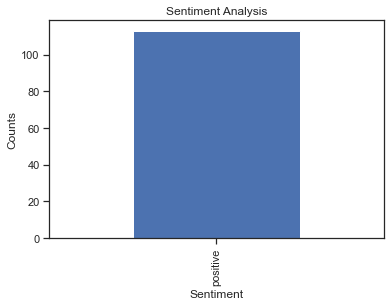

In [50]:
#visualize the sentiment counts

plt.title('Sentiment Analysis')
tweets_list['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

We can see that after removal of bots the data poses more positive and negative counts

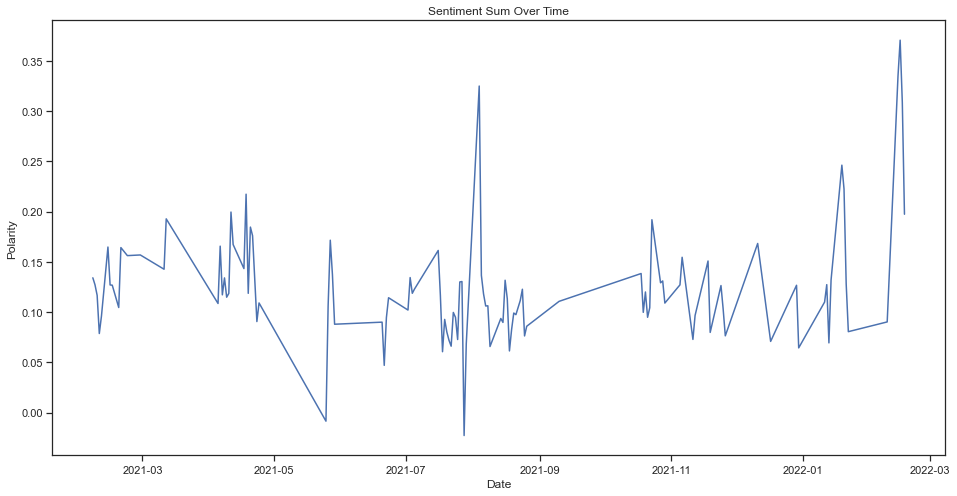

In [51]:
#plot the sum of the polarity for each date

plt.figure(figsize=(16,8))
plt.title('Sentiment Sum Over Time')
polarity = tweets_list.groupby(['Date']).sum()['Polarity']
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.plot(polarity.index, polarity)

plt.show()

[*********************100%***********************]  1 of 1 completed


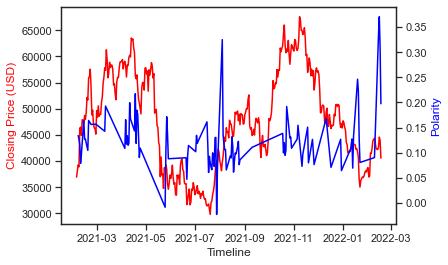

In [52]:
#using yahoo finance to look at the data for bitcoin
yahoo_bitcoin = yf.download('BTC-USD',start = '2021-02-05', end= '2022-2-18',)
yahoo_bitcoin

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(yahoo_bitcoin['Adj Close'], color="red")
# set x-axis label
ax.set_xlabel("Timeline")
# set y-axis label
ax.set_ylabel("Closing Price (USD)",color="red")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(polarity.index, polarity,color="blue")
ax2.set_ylabel("Polarity",color="blue")
plt.show()

### Looking at them on a weekly basis

### Week 1

In [53]:
weektest = tweets_list.copy()
weektest = weektest.iloc[np.r_[15:22]]
weektest

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Polarity,Subjectivity,sentiment,neg,neu,pos,compound
16,2021-04-06,"Yesterday, we reached over 100k followers on ...",yesterday reached k follower instagram use gra...,59171.933594,59479.578125,57646.808594,58192.359375,58192.359375,66058027988,-865.519531,0,0.165694,0.419544,positive,0.031,0.798,0.171,0.9994
17,2021-04-07,.@GoldmanSachs CEO David Solomon in a recent ...,ceo david solomon recent interview confirmed c...,58186.507812,58731.144531,55604.023438,56048.937500,56048.937500,75645303584,-2143.421875,0,0.117221,0.473237,positive,0.046,0.816,0.138,0.9984
18,2021-04-08,Investor participation in #Bitcoin soared in ...,investor participation bitcoin soared q btc ra...,56099.914062,58338.738281,55879.085938,58323.953125,58323.953125,53053855641,2275.015625,1,0.134086,0.406658,positive,0.038,0.860,0.101,0.9968
19,2021-04-09,"With Bitcoin on everyone's tongue, have you v...",bitcoin everyone tongue visited bitcoin analyt...,58326.562500,58937.046875,57807.863281,58245.003906,58245.003906,46655208546,-78.949219,0,0.114875,0.442769,positive,0.036,0.822,0.142,0.9990
20,2021-04-10,We are back to seeing Bitcoin over 60k after ...,back seeing bitcoin k increase price last hour...,58253.777344,61276.664062,58038.707031,59793.234375,59793.234375,58238470525,1548.230469,1,0.118725,0.408451,positive,0.034,0.809,0.157,0.9991
21,2021-04-11,"For those just getting started in crypto, we'...",getting started crypto broken five common misc...,59846.230469,60790.554688,59289.796875,60204.964844,60204.964844,46280252580,411.730469,1,0.199627,0.461925,positive,0.019,0.816,0.165,0.9994
22,2021-04-12,"""You got to buy $COIN when that deal comes,"" ...",got buy coin deal come say coinbase market lar...,60175.945312,61253.035156,59589.875000,59893.453125,59893.453125,51828688519,-311.511719,0,0.167267,0.427507,positive,0.042,0.803,0.155,0.9989


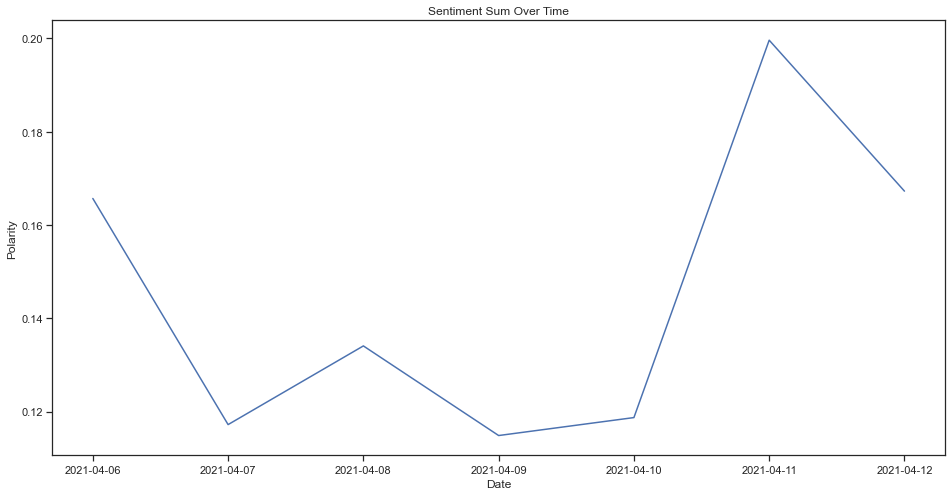

In [54]:
#plot the sum of the polarity for each date

plt.figure(figsize=(16,8))
plt.title('Sentiment Sum Over Time')
polarity = weektest.groupby(['Date']).sum()['Polarity']
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.plot(polarity.index, polarity)

plt.show()

[*********************100%***********************]  1 of 1 completed


C:\Users\rahil\AppData\Local\Temp/ipykernel_12824/2099216138.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["one", "two", "three", "four"], rotation=45)


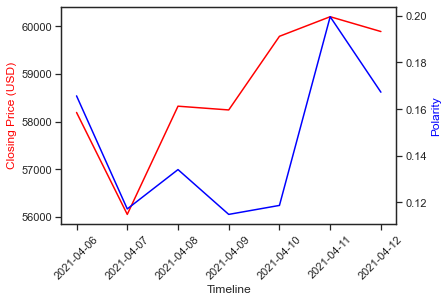

In [55]:
#using yahoo finance to look at the data for bitcoin
yahoo_bitcoin = yf.download('BTC-USD',start = '2021-04-07', end= '2021-04-13')
yahoo_bitcoin

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(yahoo_bitcoin['Adj Close'], color="red")
# set x-axis label
ax.set_xlabel("Timeline")
# set y-axis label
ax.set_ylabel("Closing Price (USD)",color="red")
ax.set_xticklabels(["one", "two", "three", "four"], rotation=45)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(polarity.index, polarity,color="blue")
ax2.set_ylabel("Polarity",color="blue")
plt.show()

#### Checking Basic Correlation

In [56]:
yahoo_bitcoin = yahoo_bitcoin.reset_index()
yahoo_bitcoin = yahoo_bitcoin[['Date','Adj Close']]
yahoo_bitcoin

,Date,Adj Close
0,2021-04-06,58192.359375
1,2021-04-07,56048.937500
2,2021-04-08,58323.953125
3,2021-04-09,58245.003906
4,2021-04-10,59793.234375
5,2021-04-11,60204.964844
6,2021-04-12,59893.453125


In [57]:
price = yahoo_bitcoin[['Date','Adj Close']]
polarity = weektest[['Date','Polarity']]
price = price.merge(polarity,on='Date')

x = price['Adj Close']
y = price['Polarity']

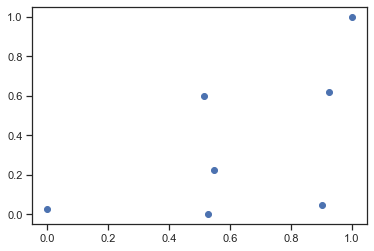

In [58]:
x_normalized = (x-min(x))/(max(x)-min(x))
y_normalized = (y-min(y))/(max(y)-min(y))
                         
plt.scatter(x_normalized, y_normalized)
plt.show()

In [59]:
df = pd.DataFrame(list(zip(x_normalized, y_normalized)))
df

,0,1
0,0.515738,0.599617
1,0.000000,0.027671
2,0.547402,0.226664
3,0.528405,0.000000
4,0.900932,0.045421
5,1.000000,1.000000
6,0.925046,0.618171


In [60]:
df.corr()

,0,1
0,1.000000,0.569395
1,0.569395,1.000000


#### Running Pearson and Spearman Correlation

In [61]:
price = yahoo_bitcoin[['Date','Adj Close']]
polarity = weektest[['Date','Polarity']]
price = price.merge(polarity,on='Date')
correlation = price[['Adj Close','Polarity']]
correlation

,Adj Close,Polarity
0,58192.359375,0.165694
1,56048.937500,0.117221
2,58323.953125,0.134086
3,58245.003906,0.114875
4,59793.234375,0.118725
5,60204.964844,0.199627
6,59893.453125,0.167267


#### Pearson Correlation

In [62]:
linregress(price['Adj Close'], price['Polarity'])

LinregressResult(slope=1.2873148568616233e-05, intercept=-0.6099331713219128, rvalue=0.5693945459099453, pvalue=0.18211538193509327, stderr=8.311746881219701e-06, intercept_stderr=0.48779092964163695)

In [63]:
scipy.stats.pearsonr(price['Adj Close'], price['Polarity'])

(0.5693945459099454, 0.1821153819350934)

#### Spearman Correlation

In [64]:
scipy.stats.spearmanr(price['Adj Close'], price['Polarity'])

SpearmanrResult(correlation=0.6785714285714287, pvalue=0.0937502539598313)

### Week 2

In [65]:
weektest2 = tweets_list.copy()
weektest2 = weektest2.iloc[np.r_[23:30]]
weektest2

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Polarity,Subjectivity,sentiment,neg,neu,pos,compound
24,2021-04-18,There are many different kinds of Bitcoin wal...,many different kind bitcoin wallet web desktop...,60701.886719,61057.457031,52829.535156,56216.183594,56216.183594,97468872758,-4467.636719,0,0.217405,0.395549,positive,0.047,0.805,0.148,0.9997
25,2021-04-19,"How do the largest cryptocurrencies, such as ...",largest cryptocurrencies bitcoin ethereum comp...,56191.585938,57520.054688,54368.593750,55724.265625,55724.265625,65344865159,-491.917969,0,0.118739,0.439309,positive,0.046,0.872,0.082,0.9974
26,2021-04-20,"""If you look at YTD returns on #btc it is sig...",look ytd return btc significantly net positive...,55681.792969,57062.148438,53448.046875,56473.031250,56473.031250,67849323955,748.765625,1,0.184662,0.469174,positive,0.029,0.871,0.100,0.9994
27,2021-04-21,JPMorgan managing director Nikolaos Panigirtz...,jpmorgan managing director nikolaos panigirtzo...,56471.128906,56757.972656,53695.468750,53906.089844,53906.089844,54926612466,-2566.941406,0,0.176076,0.395329,positive,0.031,0.825,0.144,0.9997
28,2021-04-22,There are over 100 forks of Bitcoin — let's d...,fork bitcoin let dive popular crypto cryptocur...,53857.105469,55410.230469,50583.812500,51762.273438,51762.273438,74798630778,-2143.816406,0,0.133198,0.473757,positive,0.049,0.820,0.131,0.9993
29,2021-04-23,"Bitcoin has fallen below $50,000 for the firs...",bitcoin fallen first time since march buying d...,51739.808594,52120.792969,47714.664062,51093.652344,51093.652344,86668667320,-668.621094,0,0.090639,0.427573,positive,0.064,0.829,0.107,0.9976
30,2021-04-24,Bitcoin has fallen over 19% in the past week ...,bitcoin fallen past week high coinbase went pu...,51143.226562,51167.562500,48805.285156,50050.867188,50050.867188,49014494781,-1042.785156,0,0.109171,0.444365,positive,0.035,0.852,0.113,0.9995


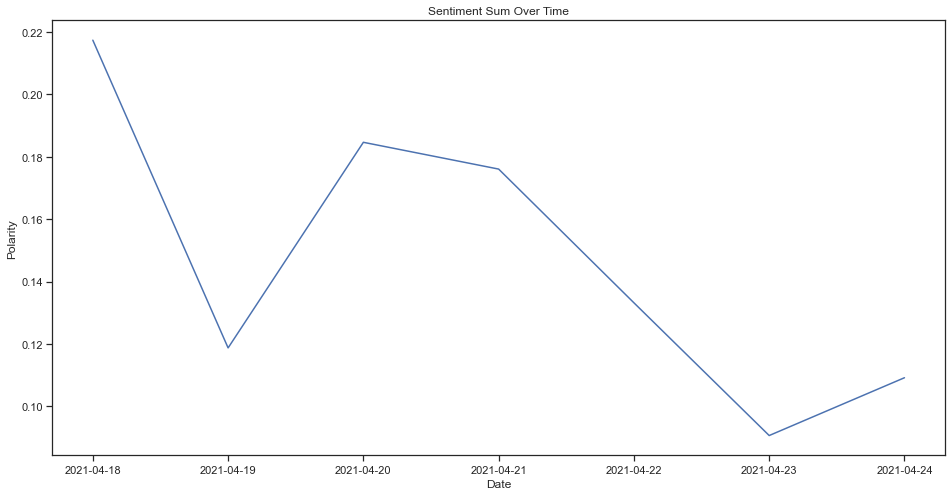

In [66]:
#plot the sum of the polarity for each date

plt.figure(figsize=(16,8))
plt.title('Sentiment Sum Over Time')
polarity = weektest2.groupby(['Date']).sum()['Polarity']
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.plot(polarity.index, polarity)

plt.show()

[*********************100%***********************]  1 of 1 completed


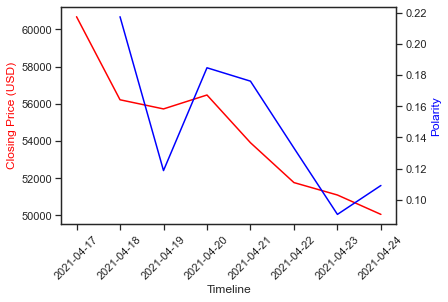

In [67]:
#using yahoo finance to look at the data for bitcoin
yahoo_bitcoin = yf.download('BTC-USD',start = '2021-04-18', end= '2021-04-25')
yahoo_bitcoin

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(yahoo_bitcoin['Adj Close'], color="red")
# set x-axis label
ax.set_xlabel("Timeline")
# set y-axis label
ax.set_ylabel("Closing Price (USD)",color="red")
ax.set_xticklabels([], rotation=45)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(polarity.index, polarity,color="blue")
ax2.set_ylabel("Polarity",color="blue")
plt.show()

#### Checking Basic Correlation

In [68]:
yahoo_bitcoin = yahoo_bitcoin.reset_index()
yahoo_bitcoin = yahoo_bitcoin[['Date','Adj Close']]
yahoo_bitcoin

,Date,Adj Close
0,2021-04-17,60683.820312
1,2021-04-18,56216.183594
2,2021-04-19,55724.265625
3,2021-04-20,56473.031250
4,2021-04-21,53906.089844
5,2021-04-22,51762.273438
6,2021-04-23,51093.652344
7,2021-04-24,50050.867188


In [69]:
price = yahoo_bitcoin[['Date','Adj Close']]
polarity = weektest2[['Date','Polarity']]
price = price.merge(polarity,on='Date')

x = price['Adj Close']
y = price['Polarity']

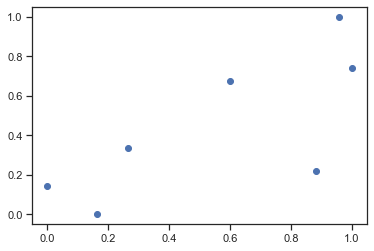

In [70]:
x_normalized = (x-min(x))/(max(x)-min(x))
y_normalized = (y-min(y))/(max(y)-min(y))
                         
plt.scatter(x_normalized, y_normalized)
plt.show()

In [71]:
df = pd.DataFrame(list(zip(x_normalized, y_normalized)))
df.corr()

,0,1
0,1.000000,0.739258
1,0.739258,1.000000


#### Running Pearson and Spearman Correlation

In [72]:
price = yahoo_bitcoin[['Date','Adj Close']]
polarity = weektest2[['Date','Polarity']]
price = price.merge(polarity,on='Date')
correlation = price[['Adj Close','Polarity']]
correlation

,Adj Close,Polarity
0,56216.183594,0.217405
1,55724.265625,0.118739
2,56473.031250,0.184662
3,53906.089844,0.176076
4,51762.273438,0.133198
5,51093.652344,0.090639
6,50050.867188,0.109171


#### Pearson Correlation

In [73]:
linregress(price['Adj Close'], price['Polarity'])

LinregressResult(slope=1.2920426460116408e-05, intercept=-0.5454563104640036, rvalue=0.7392577821718688, pvalue=0.057604636191401104, stderr=5.263608705575191e-06, intercept_stderr=0.2824434019900905)

In [74]:
scipy.stats.pearsonr(price['Adj Close'], price['Polarity'])

(0.739257782171869, 0.05760463619140101)

#### Spearman Correlation

In [75]:
scipy.stats.spearmanr(price['Adj Close'], price['Polarity'])

SpearmanrResult(correlation=0.8214285714285715, pvalue=0.023448808345691505)

### Week 3

In [76]:
weektest3 = tweets_list.copy()
weektest3 = weektest3.iloc[np.r_[48:55]]
weektest3

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Polarity,Subjectivity,sentiment,neg,neu,pos,compound
49,2021-07-21,#Varanasi: Private hospitals run out of vacci...,varanasi private hospital run vaccine huge cro...,29796.285156,32752.326172,29526.183594,32110.693359,32110.693359,28203024559,2303.345703,1,0.071984,0.400244,positive,0.042,0.777,0.180,0.9996
50,2021-07-22,#Baseball is Mexico’s second biggest national...,baseball mexico second biggest national sport ...,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,19555230518,202.412109,1,0.066134,0.444284,positive,0.066,0.778,0.156,0.9992
51,2021-07-23,Japanese tennis star Naomi Osaka lights the #...,japanese tennis star naomi osaka light olympic...,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,22552046192,1268.445312,1,0.099715,0.454895,positive,0.037,0.824,0.139,0.9993
52,2021-07-24,"Join the ""Jetswap Finance (WINGS)"" Airdrop ($...",join jetswap finance wing airdrop k prize pool...,33593.730469,34490.390625,33424.859375,34292.445312,34292.445312,21664706865,710.894531,1,0.094822,0.420395,positive,0.053,0.800,0.147,0.9988
53,2021-07-25,"🚨 🚨 🚨 1,000 #BTC (34,365,883 USD) transferre...",btc usd transferred coinbase binance btc usd t...,34290.292969,35364.925781,33881.835938,35350.187500,35350.187500,20856685287,1057.742188,1,0.072757,0.437039,positive,0.067,0.759,0.174,0.9993
54,2021-07-26,#Binance Pool to Upgrade Its #BTC Mining Syst...,binance pool upgrade btc mining system binance...,35384.031250,40499.675781,35287.312500,37337.535156,37337.535156,51022126212,1987.347656,1,0.130052,0.415396,positive,0.056,0.804,0.140,0.9985
55,2021-07-27,"🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 9,500 #BTC (353,243,774 ...",btc usd transferred unknown wallet unknown wal...,37276.035156,39406.941406,36441.726562,39406.941406,39406.941406,35097370560,2069.406250,1,0.130466,0.415830,positive,0.048,0.823,0.129,0.9991


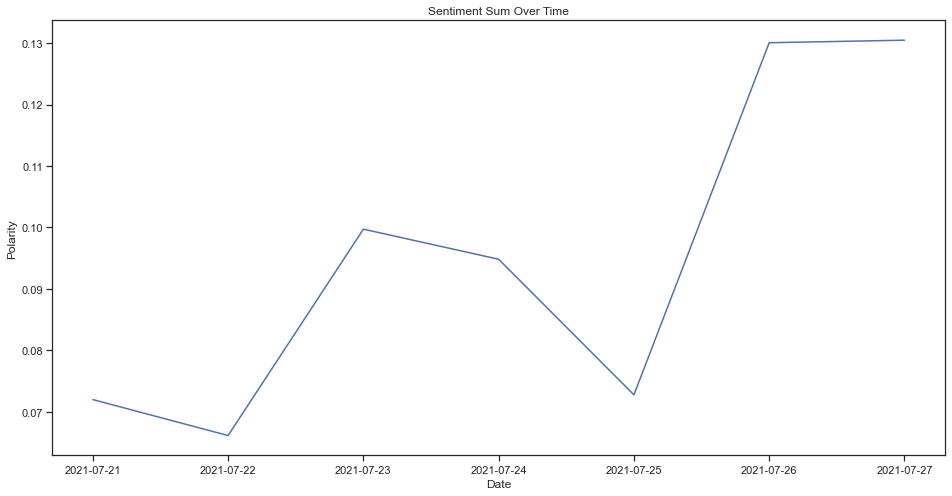

In [77]:
#plot the sum of the polarity for each date

plt.figure(figsize=(16,8))
plt.title('Sentiment Sum Over Time')
polarity = weektest3.groupby(['Date']).sum()['Polarity']
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.plot(polarity.index, polarity)

plt.show()

[*********************100%***********************]  1 of 1 completed


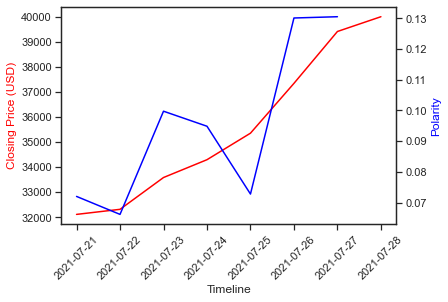

In [78]:
#using yahoo finance to look at the data for bitcoin
yahoo_bitcoin = yf.download('BTC-USD',start = '2021-07-22', end= '2021-07-29')
yahoo_bitcoin

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(yahoo_bitcoin['Adj Close'], color="red")
# set x-axis label
ax.set_xlabel("Timeline")
# set y-axis label
ax.set_ylabel("Closing Price (USD)",color="red")
ax.set_xticklabels([], rotation=45)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(polarity.index, polarity,color="blue")
ax2.set_ylabel("Polarity",color="blue")
plt.show()

#### Checking Basic Correlation

In [79]:
yahoo_bitcoin = yahoo_bitcoin.reset_index()
yahoo_bitcoin = yahoo_bitcoin[['Date','Adj Close']]
yahoo_bitcoin

,Date,Adj Close
0,2021-07-21,32110.693359
1,2021-07-22,32313.105469
2,2021-07-23,33581.550781
3,2021-07-24,34292.445312
4,2021-07-25,35350.187500
5,2021-07-26,37337.535156
6,2021-07-27,39406.941406
7,2021-07-28,39995.906250


In [80]:
price = yahoo_bitcoin[['Date','Adj Close']]
polarity = weektest3[['Date','Polarity']]
price = price.merge(polarity,on='Date')

x = price['Adj Close']
y = price['Polarity']

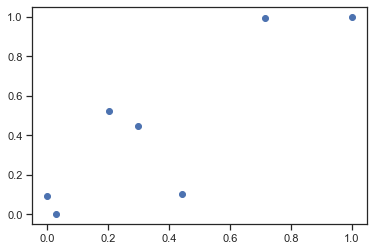

In [81]:
x_normalized = (x-min(x))/(max(x)-min(x))
y_normalized = (y-min(y))/(max(y)-min(y))
                         
plt.scatter(x_normalized, y_normalized)
plt.show()

In [82]:
df = pd.DataFrame(list(zip(x_normalized, y_normalized)))
df.corr()

,0,1
0,1.000000,0.848989
1,0.848989,1.000000


#### Running Pearson and Spearman Correlation

In [83]:
price = yahoo_bitcoin[['Date','Adj Close']]
polarity = weektest3[['Date','Polarity']]
price = price.merge(polarity,on='Date')
correlation = price[['Adj Close','Polarity']]
correlation

,Adj Close,Polarity
0,32110.693359,0.071984
1,32313.105469,0.066134
2,33581.550781,0.099715
3,34292.445312,0.094822
4,35350.187500,0.072757
5,37337.535156,0.130052
6,39406.941406,0.130466


#### Pearson Correlation

In [84]:
linregress(price['Adj Close'], price['Polarity'])

LinregressResult(slope=8.551627075555503e-06, intercept=-0.20343178562211564, rvalue=0.8489891850659201, pvalue=0.015664053105529898, stderr=2.3803060726850234e-06, intercept_stderr=0.08331343328782713)

In [85]:
scipy.stats.pearsonr(price['Adj Close'], price['Polarity'])

(0.8489891850659199, 0.015664053105529943)

#### Spearman Correlation

In [86]:
scipy.stats.spearmanr(price['Adj Close'], price['Polarity'])

SpearmanrResult(correlation=0.8214285714285715, pvalue=0.023448808345691505)

### Week 4

In [87]:
weektest4 = tweets_list.copy()
weektest4 = weektest4.iloc[np.r_[69:76]]
weektest4

,Date,Tweet,Clean,Open,High,Low,Close,Adj Close,Volume,Price Difference,Label,Polarity,Subjectivity,sentiment,neg,neu,pos,compound
70,2021-08-19,Think you know your #Bitcoin from #Dogecoin? ...,think know bitcoin dogecoin test crypto knowle...,44741.882812,46970.761719,43998.316406,46717.578125,46717.578125,37204312299,1916.390625,1,0.082668,0.418017,positive,0.048,0.777,0.175,0.9995
71,2021-08-20,The popularity of #Bitcoin has rallied the #c...,popularity bitcoin rallied cryptocurrency sinc...,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452,2621.597656,1,0.099138,0.439060,positive,0.055,0.753,0.192,0.9995
72,2021-08-21,#BTC price vs #Bitcoin Google searches https:...,btc price v bitcoin google search dollar lost ...,49327.074219,49717.019531,48312.199219,48905.492188,48905.492188,40585205312,-433.683594,0,0.097511,0.426204,positive,0.094,0.765,0.141,0.9942
73,2021-08-23,"#Bitcoin topped the closely watched $50,000 l...",bitcoin topped closely watched level ongoing r...,49291.675781,50482.078125,49074.605469,49546.148438,49546.148438,34305053719,640.656250,1,0.111500,0.430254,positive,0.059,0.742,0.199,0.9996
74,2021-08-24,"Opinion: ""#Bitcoin attracted a following for ...",opinion bitcoin attracted following openness i...,49562.347656,49878.769531,47687.117188,47706.117188,47706.117188,35361168834,-1840.031250,0,0.122804,0.407784,positive,0.035,0.780,0.185,0.9996
75,2021-08-25,Chelsea Manning is back and has her sights se...,chelsea manning back sight set bitcoin chelsea...,47727.257812,49202.878906,47163.613281,48960.789062,48960.789062,32646349931,1254.671875,1,0.076335,0.427826,positive,0.044,0.816,0.141,0.9990
76,2021-08-26,Chelsea Manning is back and has her sights se...,chelsea manning back sight set bitcoin chelsea...,49002.640625,49347.582031,46405.781250,46942.218750,46942.218750,32666549568,-2018.570312,0,0.085948,0.405054,positive,0.053,0.792,0.155,0.9991


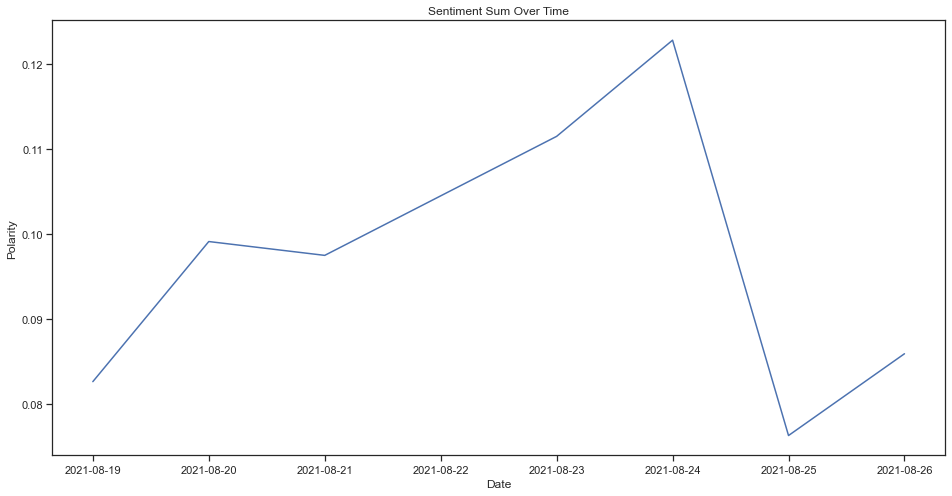

In [88]:
#plot the sum of the polarity for each date

plt.figure(figsize=(16,8))
plt.title('Sentiment Sum Over Time')
polarity = weektest4.groupby(['Date']).sum()['Polarity']
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.plot(polarity.index, polarity)

plt.show()

[*********************100%***********************]  1 of 1 completed


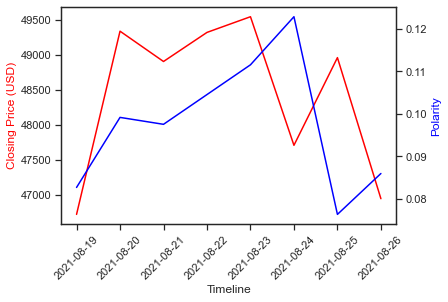

In [89]:
#using yahoo finance to look at the data for bitcoin
yahoo_bitcoin = yf.download('BTC-USD',start = '2021-08-20', end= '2021-08-27')
yahoo_bitcoin

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(yahoo_bitcoin['Adj Close'], color="red")
# set x-axis label
ax.set_xlabel("Timeline")
# set y-axis label
ax.set_ylabel("Closing Price (USD)",color="red")
ax.set_xticklabels([], rotation=45)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(polarity.index, polarity,color="blue")
ax2.set_ylabel("Polarity",color="blue")
plt.show()

#### Checking Basic Correlation

In [90]:
yahoo_bitcoin = yahoo_bitcoin.reset_index()
yahoo_bitcoin = yahoo_bitcoin[['Date','Adj Close']]
yahoo_bitcoin

,Date,Adj Close
0,2021-08-19,46717.578125
1,2021-08-20,49339.175781
2,2021-08-21,48905.492188
3,2021-08-22,49321.652344
4,2021-08-23,49546.148438
5,2021-08-24,47706.117188
6,2021-08-25,48960.789062
7,2021-08-26,46942.218750


In [91]:
price = yahoo_bitcoin[['Date','Adj Close']]
polarity = weektest4[['Date','Polarity']]
price = price.merge(polarity,on='Date')

x = price['Adj Close']
y = price['Polarity']

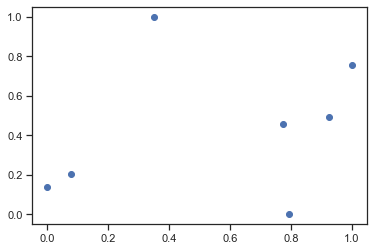

In [92]:
x_normalized = (x-min(x))/(max(x)-min(x))
y_normalized = (y-min(y))/(max(y)-min(y))
                         
plt.scatter(x_normalized, y_normalized)
plt.show()

In [93]:
df = pd.DataFrame(list(zip(x_normalized, y_normalized)))
df.corr()

,0,1
0,1.00000,0.25421
1,0.25421,1.00000


#### Running Pearson and Spearman Correlation

In [94]:
price = yahoo_bitcoin[['Date','Adj Close']]
polarity = weektest4[['Date','Polarity']]
price = price.merge(polarity,on='Date')
correlation = price[['Adj Close','Polarity']]
correlation

,Adj Close,Polarity
0,46717.578125,0.082668
1,49339.175781,0.099138
2,48905.492188,0.097511
3,49546.148438,0.111500
4,47706.117188,0.122804
5,48960.789062,0.076335
6,46942.218750,0.085948


#### Pearson Correlation

In [95]:
linregress(price['Adj Close'], price['Polarity'])

LinregressResult(slope=3.602668803846168e-06, intercept=-0.07746013200805353, rvalue=0.25421024250052493, pvalue=0.582247401287891, stderr=6.129706363970503e-06, intercept_stderr=0.29615390089695354)

In [96]:
scipy.stats.pearsonr(price['Adj Close'], price['Polarity'])

(0.254210242500525, 0.5822474012878907)

#### Spearman Correlation

In [97]:
scipy.stats.spearmanr(price['Adj Close'], price['Polarity'])

SpearmanrResult(correlation=0.3571428571428572, pvalue=0.4316113520383278)

In [98]:
#create a list of columns to keep (Hybrid Version)

df = tweets_list[['Open','High','Low','Volume','Subjectivity','Polarity','compound','neg','neu','pos','Label']]
df

,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,neu,pos,Label
1,38138.386719,40846.546875,38138.386719,71326033653,0.381740,0.134193,0.9980,0.035,0.830,0.134,1
2,39250.191406,39621.835938,37446.152344,65500641143,0.381238,0.127266,0.9982,0.052,0.794,0.155,0
3,38886.828125,46203.929688,38076.324219,101467222687,0.371345,0.116754,0.9981,0.037,0.828,0.135,1
4,46184.992188,48003.722656,45166.960938,91809846886,0.393756,0.078746,0.9977,0.043,0.825,0.132,1
5,46469.761719,47145.566406,43881.152344,87301089896,0.424299,0.096121,0.9939,0.056,0.825,0.119,0
6,47491.203125,48047.746094,46392.281250,70250456155,0.487121,0.164809,0.9987,0.009,0.852,0.139,1
7,47114.507812,49487.640625,47114.507812,71248675228,0.411779,0.127086,0.9995,0.045,0.750,0.205,1
8,48696.535156,48875.570312,46347.476562,77069903166,0.407565,0.126844,0.9990,0.029,0.802,0.169,0
9,52140.972656,52474.105469,51015.765625,52054723579,0.436162,0.104625,0.9995,0.034,0.753,0.212,1
10,51675.980469,56113.652344,50937.277344,63495496918,0.444585,0.164263,0.9983,0.013,0.852,0.135,1


In [99]:
#create the feature data set
X = df
X = np.array (X.drop(['Label'], 1))

#create the target data set
y = np.array(df['Label'])

C:\Users\rahil\AppData\Local\Temp/ipykernel_12824/950483841.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array (X.drop(['Label'], 1))


In [100]:
#split the data in 80/20 (following the time-series format)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [101]:
len(x_train)

90

In [102]:
len(x_test)

23

### Linear Discriminant Analysis

#### Tuning Hyperparameters

In [103]:
clf = GridSearchCV(LinearDiscriminantAnalysis(), {
    'solver': ['svd', 'lsqr', 'eigen']
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring = 'f1_micro')
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.04496002, 0.00600195, 0.00699925]),
 'std_fit_time': array([0., 0., 0.]),
 'mean_score_time': array([0.00200105, 0.00100112, 0.00199842]),
 'std_score_time': array([0., 0., 0.]),
 'param_solver': masked_array(data=['svd', 'lsqr', 'eigen'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'svd'}, {'solver': 'lsqr'}, {'solver': 'eigen'}],
 'split0_test_score': array([0.86956522, 0.86956522, 0.86956522]),
 'mean_test_score': array([0.86956522, 0.86956522, 0.86956522]),
 'std_test_score': array([0., 0., 0.]),
 'rank_test_score': array([1, 1, 1])}

In [104]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044960,0.0,0.002001,0.0,svd,{'solver': 'svd'},0.869565,0.869565,0.0,1
1,0.006002,0.0,0.001001,0.0,lsqr,{'solver': 'lsqr'},0.869565,0.869565,0.0,1
2,0.006999,0.0,0.001998,0.0,eigen,{'solver': 'eigen'},0.869565,0.869565,0.0,1


In [105]:
df[['param_solver','mean_test_score']]

,param_solver,mean_test_score
0,svd,0.869565
1,lsqr,0.869565
2,eigen,0.869565


In [106]:
clf.best_params_

{'solver': 'svd'}

In [107]:
clf.best_score_

0.8695652173913043

#### Running The Official Model

In [108]:
#create and train the model 

model = LinearDiscriminantAnalysis(solver = 'svd').fit(x_train, y_train)

In [109]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1])

In [110]:
#checking the actual
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1])

In [111]:
#show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.75      1.00      0.86         9

    accuracy                           0.87        23
   macro avg       0.88      0.89      0.87        23
weighted avg       0.90      0.87      0.87        23



In [112]:
print('Accuracy of LDA:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of LDA: 0.8695652173913043
Precision: 0.75
Recall: 1.0
ROC-AUC: 0.8928571428571428


### Random Forest Classifier

#### Tuning Hyperparameters

In [113]:
clf = GridSearchCV(RandomForestClassifier(random_state = 42), {
    'n_estimators': [1,5,10,20,30,40,50,60,70,80,90,100,1000],
    'criterion': ['gini', 'entropy']    
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring = 'f1_micro')
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.0267272 , 0.00900126, 0.01499891, 0.03300571, 0.04800057,
        0.05302095, 0.07200646, 0.09102654, 0.0900259 , 0.09303212,
        0.12525463, 0.15465379, 1.34135938, 0.00300646, 0.01200271,
        0.0150044 , 0.03800941, 0.05401254, 0.06400824, 0.09002233,
        0.0874362 , 0.09374285, 0.10498691, 0.14898562, 0.14401031,
        1.33968997]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.00300121, 0.00200081, 0.00299215, 0.00302052, 0.00499153,
        0.00400448, 0.00700212, 0.00500059, 0.00699091, 0.00700283,
        0.00754142, 0.00900197, 0.09101558, 0.00199652, 0.00199986,
        0.00300097, 0.0029974 , 0.00400472, 0.00399852, 0.00700045,
        0.00499511, 0.00700665, 0.00698662, 0.01100469, 0.00900126,
        0.07801461]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        

In [114]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026727,0.0,0.003001,0.0,gini,1,"{'criterion': 'gini', 'n_estimators': 1}",0.652174,0.652174,0.0,1
1,0.009001,0.0,0.002001,0.0,gini,5,"{'criterion': 'gini', 'n_estimators': 5}",0.565217,0.565217,0.0,5
2,0.014999,0.0,0.002992,0.0,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.608696,0.608696,0.0,3
3,0.033006,0.0,0.003021,0.0,gini,20,"{'criterion': 'gini', 'n_estimators': 20}",0.652174,0.652174,0.0,1
4,0.048001,0.0,0.004992,0.0,gini,30,"{'criterion': 'gini', 'n_estimators': 30}",0.565217,0.565217,0.0,5
5,0.053021,0.0,0.004004,0.0,gini,40,"{'criterion': 'gini', 'n_estimators': 40}",0.521739,0.521739,0.0,12
6,0.072006,0.0,0.007002,0.0,gini,50,"{'criterion': 'gini', 'n_estimators': 50}",0.565217,0.565217,0.0,5
7,0.091027,0.0,0.005001,0.0,gini,60,"{'criterion': 'gini', 'n_estimators': 60}",0.565217,0.565217,0.0,5
8,0.090026,0.0,0.006991,0.0,gini,70,"{'criterion': 'gini', 'n_estimators': 70}",0.565217,0.565217,0.0,5
9,0.093032,0.0,0.007003,0.0,gini,80,"{'criterion': 'gini', 'n_estimators': 80}",0.608696,0.608696,0.0,3


In [115]:
df[['params','mean_test_score']]

,params,mean_test_score
0,"{'criterion': 'gini', 'n_estimators': 1}",0.652174
1,"{'criterion': 'gini', 'n_estimators': 5}",0.565217
2,"{'criterion': 'gini', 'n_estimators': 10}",0.608696
3,"{'criterion': 'gini', 'n_estimators': 20}",0.652174
4,"{'criterion': 'gini', 'n_estimators': 30}",0.565217
5,"{'criterion': 'gini', 'n_estimators': 40}",0.521739
6,"{'criterion': 'gini', 'n_estimators': 50}",0.565217
7,"{'criterion': 'gini', 'n_estimators': 60}",0.565217
8,"{'criterion': 'gini', 'n_estimators': 70}",0.565217
9,"{'criterion': 'gini', 'n_estimators': 80}",0.608696


In [116]:
clf.best_params_

{'criterion': 'gini', 'n_estimators': 1}

In [117]:
clf.best_score_

0.6521739130434783

#### Running The Official Model

In [118]:
#create and train the model 

model = RandomForestClassifier(criterion='gini', n_estimators = 1, random_state = 42).fit(x_train, y_train)

In [119]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0])

In [120]:
#checking the actual
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1])

In [121]:
#show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.56      0.56      0.56         9

    accuracy                           0.65        23
   macro avg       0.63      0.63      0.63        23
weighted avg       0.65      0.65      0.65        23



In [122]:
print('Accuracy of RF:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of RF: 0.6521739130434783
Precision: 0.5555555555555556
Recall: 0.5555555555555556
ROC-AUC: 0.6349206349206349


### Logistic Regression

#### Tuning Hyperparameters

In [123]:
clf = GridSearchCV(LogisticRegression(random_state = 42), {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1,2,3,4,5,6,7,8,9,10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring = 'f1_micro')
clf.fit(X, y)
clf.cv_results_

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErr

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  wa

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErr

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rahil\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'mean_fit_time': array([0.        , 0.        , 0.10752487, 0.        , 0.00300145,
        0.04100657, 0.00400686, 0.00199842, 0.0020051 , 0.00099802,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14718676, 0.00253701, 0.        , 0.00212431, 0.00199986,
        0.        , 0.        , 0.06900668, 0.        , 0.00299907,
        0.05657554, 0.00250912, 0.00100064, 0.00151229, 0.00153255,
        0.        , 0.00052142, 0.        , 0.        , 0.        ,
        0.15403104, 0.00500083, 0.        , 0.00300097, 0.00200152,
        0.00100112, 0.        , 0.0730195 , 0.        , 0.00199819,
        0.06201458, 0.00300193, 0.00099921, 0.00099874, 0.00099897,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.13302755, 0.00400186, 0.        , 0.00199986, 0.00200129,
        0.        , 0.        , 0.04300857, 0.        , 0.0009973 ,
        0.04801011, 0.00300097, 0.00099969, 0.00200129, 0.00199866,
        0.        , 0.        ,

In [124]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.0,0.000000,0.0,1,l1,newton-cg,"{'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}",NaN,NaN,NaN,200
1,0.000000,0.0,0.000000,0.0,1,l1,lbfgs,"{'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,125
2,0.107525,0.0,0.002003,0.0,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.913043,0.913043,0.0,1
3,0.000000,0.0,0.000000,0.0,1,l1,sag,"{'C': 1, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,126
4,0.003001,0.0,0.001008,0.0,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.391304,0.391304,0.0,31
5,0.041007,0.0,0.001003,0.0,1,l2,newton-cg,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.869565,0.869565,0.0,24
6,0.004007,0.0,0.000989,0.0,1,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.391304,0.391304,0.0,31
7,0.001998,0.0,0.001002,0.0,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.391304,0.391304,0.0,31
8,0.002005,0.0,0.000995,0.0,1,l2,sag,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.391304,0.391304,0.0,31
9,0.000998,0.0,0.001013,0.0,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.391304,0.391304,0.0,31


In [125]:
df[['params','mean_test_score']]

,params,mean_test_score
0,"{'C': 1, 'penalty': 'l1', 'solver': 'newton-cg'}",NaN
1,"{'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN
2,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.913043
3,"{'C': 1, 'penalty': 'l1', 'solver': 'sag'}",NaN
4,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.391304
5,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.869565
6,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.391304
7,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.391304
8,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.391304
9,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.391304


In [126]:
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [127]:
clf.best_score_

0.9130434782608695

#### Running The Official Model

In [128]:
#create and train the model 

model = LogisticRegression(penalty = 'l1' , solver = 'liblinear', random_state = 42).fit(x_train, y_train)

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [129]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1])

In [130]:
#checking the actual
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1])

In [131]:
#show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.89      0.89      0.89         9

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



In [132]:
print('Accuracy of LR:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of LR: 0.9130434782608695
Precision: 0.8888888888888888
Recall: 0.8888888888888888
ROC-AUC: 0.9087301587301587


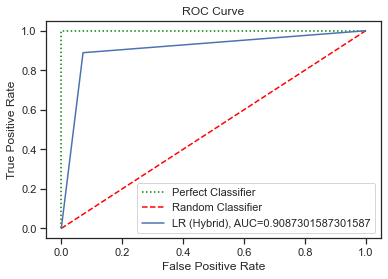

In [133]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.title('ROC Curve')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.plot(fpr,tpr,label="LR (Hybrid), AUC="+str(auc))
plt.legend(loc=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Multi Layer Perceptron

#### Tuning Hyperparameters

In [134]:
clf = GridSearchCV(MLPClassifier(random_state = 42), {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring='f1_micro')
clf.fit(X, y)
clf.cv_results_

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'mean_fit_time': array([0.05003786, 0.01003122, 0.00995612, 0.01008511, 0.04545403,
        0.06988716, 0.00955606, 0.01755977, 0.02006841, 0.012573  ,
        0.01030374, 0.00608468]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00200891, 0.0050025 , 0.        ,
        0.00201511, 0.00151634]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'param_activation': masked_array(data=['identity', 'identity', 'identity', 'logistic',
                    'logistic', 'logistic', 'tanh', 'tanh', 'tanh', 'relu',
                    'relu', 'relu'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['lbfgs', 'sgd', 'adam', 'lbfgs', 'sgd', 'adam',
            

In [135]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050038,0.0,0.000000,0.0,identity,lbfgs,"{'activation': 'identity', 'solver': 'lbfgs'}",0.391304,0.391304,0.0,4
1,0.010031,0.0,0.000000,0.0,identity,sgd,"{'activation': 'identity', 'solver': 'sgd'}",0.391304,0.391304,0.0,4
2,0.009956,0.0,0.000000,0.0,identity,adam,"{'activation': 'identity', 'solver': 'adam'}",0.391304,0.391304,0.0,4
3,0.010085,0.0,0.000000,0.0,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.391304,0.391304,0.0,4
4,0.045454,0.0,0.000000,0.0,logistic,sgd,"{'activation': 'logistic', 'solver': 'sgd'}",0.608696,0.608696,0.0,1
5,0.069887,0.0,0.000000,0.0,logistic,adam,"{'activation': 'logistic', 'solver': 'adam'}",0.391304,0.391304,0.0,4
6,0.009556,0.0,0.000000,0.0,tanh,lbfgs,"{'activation': 'tanh', 'solver': 'lbfgs'}",0.391304,0.391304,0.0,4
7,0.017560,0.0,0.002009,0.0,tanh,sgd,"{'activation': 'tanh', 'solver': 'sgd'}",0.608696,0.608696,0.0,1
8,0.020068,0.0,0.005002,0.0,tanh,adam,"{'activation': 'tanh', 'solver': 'adam'}",0.608696,0.608696,0.0,1
9,0.012573,0.0,0.000000,0.0,relu,lbfgs,"{'activation': 'relu', 'solver': 'lbfgs'}",0.391304,0.391304,0.0,4


In [136]:
df[['params','mean_test_score']]

,params,mean_test_score
0,"{'activation': 'identity', 'solver': 'lbfgs'}",0.391304
1,"{'activation': 'identity', 'solver': 'sgd'}",0.391304
2,"{'activation': 'identity', 'solver': 'adam'}",0.391304
3,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.391304
4,"{'activation': 'logistic', 'solver': 'sgd'}",0.608696
5,"{'activation': 'logistic', 'solver': 'adam'}",0.391304
6,"{'activation': 'tanh', 'solver': 'lbfgs'}",0.391304
7,"{'activation': 'tanh', 'solver': 'sgd'}",0.608696
8,"{'activation': 'tanh', 'solver': 'adam'}",0.608696
9,"{'activation': 'relu', 'solver': 'lbfgs'}",0.391304


In [137]:
clf.best_params_

{'activation': 'logistic', 'solver': 'sgd'}

In [138]:
clf.best_score_

0.6086956521739131

#### Running The Official Model

In [139]:
#create and train the model 

model = MLPClassifier(activation = 'logistic', solver = 'sgd', random_state = 42).fit(x_train, y_train)

In [140]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [141]:
#checking the actual
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1])

In [142]:
#show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        14
           1       0.00      0.00      0.00         9

    accuracy                           0.61        23
   macro avg       0.30      0.50      0.38        23
weighted avg       0.37      0.61      0.46        23



C:\Users\rahil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
print('Accuracy of MLP:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of MLP: 0.6086956521739131
Precision: 0.0
Recall: 0.0
ROC-AUC: 0.5


C:\Users\rahil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

#### Tuning Hyperparameters

In [144]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [1,3,5,7,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [0,10,20,30,40,50,60,70,80,90,100],
}, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=42), return_train_score=False, scoring = 'f1_micro')
clf.fit(X, y)
clf.cv_results_

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 503, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1060, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_va

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 499, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1060, in sklearn.neighbors._ball_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\rahil\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 503, in _fit
    self._tree = KDTree(X, self.leaf_size,
  File "sklearn\neighbors\_binary_tree.pxi", line 1060, in sklearn.neighbors._kd_tree.BinaryTree.__init__
ValueError: leaf_size must be greater than or equal to 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_va

C:\Users\rahil\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.52173913 0.52173913
 0.60869565 0.52173913 0.56521739 0.52173913 0.7826087  0.52173913
 0.65217391 0.52173913 0.52173913 0.52173913 0.60869565 0.52173913
 0.56521739 0.52173913 0.7826087  0.52173913 0.65217391 0.52173913
 0.52173913 0.52173913 0.60869565 0.52173913 0.56521739 0.52173913
 0.7826087  0.52173913 0.65217391 0.52173913 0.52173913 0.52173913
 0.60869565 0.52173913 0.56521739 0.52173913 0.7826087  0.52173913
 0.65217391 0.52173913 0.52173913 0.52173913 0.60869565 0.52173913
 0.56521739 0.52173913 0.7826087  0.52173913 0.65217391 0.52173913
 0.52173913 0.52173913 0.60869565 0.52173913 0.56521739 0.52173913
 0.7826087  0.52173913 0.65217391 0.52173913 0.52173913 0.52173913
 0.60869565 0.52173913 0.56521739 0.52173913 0.782608

{'mean_fit_time': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.18296051e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.53774834e-03, 4.54092026e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.01606750e-03, 0.00000000e+00,
        0.00000000e+00, 2.51817703e-03, 2.01368332e-03, 0.00000000e+00,
        5.53536415e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.02195549e-03, 2.01988220e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.01058388e-03, 0.00000000e+00,
        0.00000000e+00, 2.02631950e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.02920151e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.04684448e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000

In [145]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.0,0.000000,0.0,auto,0,1,uniform,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,440
1,0.000000,0.0,0.000000,0.0,auto,0,1,distance,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,416
2,0.000000,0.0,0.000000,0.0,auto,0,3,uniform,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,418
3,0.000000,0.0,0.000000,0.0,auto,0,3,distance,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,411
4,0.002183,0.0,0.000000,0.0,auto,0,5,uniform,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,417
5,0.000000,0.0,0.000000,0.0,auto,0,5,distance,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,419
6,0.000000,0.0,0.000000,0.0,auto,0,7,uniform,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,415
7,0.000000,0.0,0.000000,0.0,auto,0,7,distance,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,414
8,0.000000,0.0,0.000000,0.0,auto,0,9,uniform,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,413
9,0.005538,0.0,0.000000,0.0,auto,0,9,distance,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN,NaN,NaN,412


In [146]:
df[['params','mean_test_score']]

,params,mean_test_score
0,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN
1,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN
2,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN
3,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN
4,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN
5,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN
6,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN
7,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN
8,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN
9,"{'algorithm': 'auto', 'leaf_size': 0, 'n_neigh...",NaN


In [147]:
clf.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'uniform'}

In [148]:
clf.best_score_

0.782608695652174

#### Running The Official Model

In [149]:
#create and train the model 

model = KNeighborsClassifier(algorithm = 'auto', leaf_size = 10, n_neighbors = 7, weights = 'uniform').fit(x_train, y_train)

In [150]:
#show the model's predictions
predictions = model.predict(x_test)
predictions

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1])

In [151]:
#checking the actual
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1])

In [152]:
#show the model metric

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.67      0.89      0.76         9

    accuracy                           0.78        23
   macro avg       0.79      0.80      0.78        23
weighted avg       0.81      0.78      0.79        23



In [153]:
print('Accuracy of KNN:', accuracy_score(y_test, model.predict(x_test)))
print('Precision:', precision_score(y_test, model.predict(x_test)))
print('Recall:', recall_score(y_test, model.predict(x_test)))
print('ROC-AUC: {}'.format(roc_auc_score(y_test, predictions)))

Accuracy of KNN: 0.782608695652174
Precision: 0.6666666666666666
Recall: 0.8888888888888888
ROC-AUC: 0.8015873015873016
